# Análisis de precio de los vehículos

En el presente trabajo de investigación se pretende determinar que factores permiten aumentar el precio de los vehículos dependiendo de diversas caracteristicas como el modelo del auto, su año de lanzamiento al mercado, la edad del mismo, su precio de venta, sus millas recorridas, entre otros.

Se pretende primeramente limpiar los datos, eliminar la mayor cantidad posible de ausentes de la manera más óptima, y así comenzar a estudiar las relaciones entre estos y de esta forma llegar a la conclusiones pertienentes basado en diversas categorías.

## Inicialización

In [1247]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn


In [1248]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cargar datos

Se procede a cargar los datos

In [1249]:
# Carga el archivo de datos en un DataFrame
try:
  autos = pd.read_csv('/datasets/vehicles_us.csv')
except:
  autos = pd.read_csv('/content/drive/MyDrive/practicum/Sprint 3/vehicles_us (1).csv')


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

Primeramente para estudiar los datos procedemos a mostrar las 10 primeras filas del DataFrame.

In [1250]:
# imprimiendo la información general/resumida sobre el DataFrame
autos.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Para estudiar el comportamiento de los datos. y determinar valores ausentes y el tipo de dato apicamos la siguiente instrucción:

In [1251]:
autos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Se puede observar que las columnas `model_year`, `cylinders`, `odometer`, `paint_color` y `is_4wd` cuentan con valores ausentes. Así mismo observamos que los tipo de datos son `enteros`, `coma flotante` y `objeto`. Sin embargo si leemos la referencia de las columnas vemos que también debería existir de tipo `DateTime`.
 

Hay que analizar la caracteristica de la tracción en las 4 ruedas, ya que, muy probablemente se tomaron los valores que deberían ser `0` como `NAN` por lo que en realidad allí no hay valores nulos o estos pueden en su defecto sustituitse con `0`. Y esta es precisamente la columna con mayor catidad de valores asuentes

Para facilitar el trabajo posteriomente, Se procederá a ver los valores únicos de las columnas que presuntamente son categóricas.

In [1252]:
autos['model_year'].sort_values().unique()

array([1908., 1929., 1936., 1948., 1949., 1954., 1955., 1958., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019.,   nan])

In [1253]:
autos['model'].sort_values().unique()


array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

In [1254]:
autos['condition'].sort_values().unique()


array(['excellent', 'fair', 'good', 'like new', 'new', 'salvage'],
      dtype=object)

In [1255]:
autos['cylinders'].sort_values().unique()


array([ 3.,  4.,  5.,  6.,  8., 10., 12., nan])

In [1256]:
autos['fuel'].sort_values().unique()


array(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype=object)

In [1257]:
autos['transmission'].sort_values().unique()


array(['automatic', 'manual', 'other'], dtype=object)

In [1258]:
autos['type'].sort_values().unique()


array(['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon'],
      dtype=object)

In [1259]:
autos['paint_color'].sort_values().unique()


array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange',
       'purple', 'red', 'silver', 'white', 'yellow', nan], dtype=object)

In [1260]:
autos['is_4wd'].sort_values().unique()


array([ 1., nan])

### Conclusiones y siguientes pasos

Primeramente se puede concluir, que en diversas columnas el tipo de dato está errado, esto debido a que muchos son tiplo coma flotante, cuando deberián ser enteros. No puedes tener 1.5 tracción en 4ruedas, o tienes o no de igual forma que no existen 4.3 cilindros, siempre son números enteros.

Del mismo modo, las columnas `date_posted` y `days_listed` deberían ser de tipo `DateType`.

Así mismo existen valores ausentes que pueden ser sustituidos por otros mas racionales o lógicos como en el caso `is_4wd` donde NAN es calramente un 0 que significa Falso, al ser un booleano.

A continuación, se realizará el debido cambio de estas variables, y se estudiará la forma optima para sustituir los valores ausentes.

También se sustituirán los duplicados implicitos y explicitos, para poder realizar el correcto análisis de los datos.

## Tratar los valores ausentes 

Primeramente borramos todos los duplicados

In [1261]:
autos = autos.drop_duplicates().reindex()

Las columnas con valores ausentes son las siguientes: `model_year`, `cylinders`, `odometer`, `paint_color` y `is_4wd`, como ya se había mencionado con anterioridad. Primeramente se estudiarán por separado, para luego determinar que hará con ellas en la siguiente sección.

Comenzaremos por `is_4wd` donde sabemos de natemanos que los valores NAN son en realidad 0 que simbolizan un valor de Falso.

In [1262]:
autos['is_4wd'] = autos['is_4wd'].fillna(0)

Debido a las caracteríasticas de los valores que faltan, al ser data tecnica, no se pueden rellenar los valores ausentes de `model_year`, `cylinders` o de `paint_color` ya que estos valores dependen de multiples otros, que al no conocer, no se puede dar una respuesta concreta.

Se procede entonces a estudiar `odometer` ya que en teoría podriamos sustituir los valores por la media o la mediana dependiendo de como se distribuyan los mismos.

In [1263]:
autos['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Vemos que no existen valores demasiado dispersos, sin embargo, un auto nuevo, no puede tener el mismo kilometraje que uo viejo, aunque eso es algo relativo, en la mayoría de los casos esto se cumplirá es por ello que se saca la media del kilometraje recorrido por los autos tomando en cuenta su año de salida al mercado en grupos que se incrementan en 10 años, y sustituimos por esa media, los ausentes. 

In [1264]:
year = autos['model_year'].min()
while year < 2030:
  autos[autos['model_year']<= year]['odometer'] = autos[autos['model_year']<= year]['odometer'].fillna(autos[autos['model_year']<= year]['odometer'].mean())
  year += 10

autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Por último sustituimos el año de los modelos ausentes por la media de todo el conjunto de datos.

In [1265]:
autos['odometer'] = autos['odometer'].fillna(autos['odometer'].mean())

## Corregir los tipos de datos

Ahora vamos a corregir los tipos de datos:

- `price` ----------------------> No cambia
- `model_year` -------------> Convertir a `DateType`
- `model` ----------------------> No cambia
- `condition` ---------------> No cambia
- `cylinders` ---------------> Convertir a `int`
- `fuel` ------------------------> No cambia
- `odometer` -----------------> No cambia
- `transmission` ----------> No cambia
- `paint_color` ------------> No cambia
- `is_4wd` ---------------------> Convertir a `int`
- `date_posted` ------------> Convertir a `DateType`
- `days_listed` ------------> No cambia

In [1266]:
autos['is_4wd'] = autos['is_4wd'].astype(int)
autos['model_year'] = pd.to_datetime(autos['model_year'], format = '%Y')

autos['cylinders'] = autos['cylinders'].astype('Int64')


autos['date_posted'] = pd.to_datetime(autos['date_posted'])
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  datetime64[ns]
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  Int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: Int64(1), datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 5.6+ MB


In [1267]:
autos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011-01-01,bmw x5,good,6,gas,145000.000000,automatic,SUV,NaN,1,2018-06-23,19
1,25500,NaT,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50
2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003-01-01,ford f-150,fair,8,gas,115553.461738,automatic,pickup,NaN,0,2019-03-22,9
4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28


Para determinar que proporción de los datos son ausentes. Vamos a calcularlo a continuación ya que si es poca pueden eliminarse.

Porcentaje de datos en la columna `model_year` ausentes:

In [1268]:
(len(autos[autos['model_year'].isna()])*100)/len(autos['model_year'])

7.023774866569626

Porcentaje de datos en la columna `cylinders` ausentes:

In [1269]:
(len(autos[autos['cylinders'].isna()])*100)/len(autos['cylinders'])

10.208636584182436

Porcentaje de datos en la columna `paint_color` ausentes:

In [1270]:
(len(autos[autos['paint_color'].isna()])*100)/len(autos['paint_color'])

17.985443959243085

Todas son porciones significativas de los datos, las cuales no se pueden borrar.

## Enriquecer datos

A continuación se generarán 2 columnas más, una de ellas con los años desde que el carro salió al mercado hasta que lo publicaron para la venta `years_to_bougth`. Y otra con el promedio de kilometros recorridos por año `odometer_mean` 

In [1271]:
# Agrega los años del vehículo cuando el anuncio se colocó
lista = []
autos['years_to_bougth'] = autos['date_posted']-autos['model_year']
for i in autos['years_to_bougth']:
  if i.days < 0:
    list.append(np.nan)
  else:
    try:
      lista.append(math.floor(i.days/365))
    except:
      lista.append(np.nan)

autos['years_to_bougth'] = lista


In [1272]:
# Agrega el millaje promedio del vehículo por año
autos['odometer_mean'] = round(autos['odometer'] / autos['years_to_bougth'])

Como tenemos autos que fueron vendidos el mismo año de fabricación, tendremos 0 años cumplidos, por lo que al realizar la división nos dará infinito. Para que esto no ocurra, vamos a cambiar los valores de infinito por el recorrido que lleva el auto durante ese año.

In [1273]:
lista_index = list(autos[autos['odometer_mean'] == np.inf].index)

for i in lista_index:
  autos.loc[i,'odometer_mean'] = autos.loc[i,'odometer']

## Comprobar datos limpios

In [1274]:
# imprime la información general/resumida sobre el DataFrame
autos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       47906 non-null  datetime64[ns]
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        46265 non-null  Int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      42258 non-null  object        
 10  is_4wd           51525 non-null  int64         
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  years_to_bougth  47906 non-null  float64       
 14  odometer_mean    47904 non-null  float

In [1275]:
# imprimir una muestra de datos
autos.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_to_bougth,odometer_mean
0,9400,2011-01-01,bmw x5,good,6,gas,145000.000000,automatic,SUV,NaN,1,2018-06-23,19,7.0,20714.0
1,25500,NaT,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50,NaN,NaN
2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,6.0,18333.0
3,1500,2003-01-01,ford f-150,fair,8,gas,115553.461738,automatic,pickup,NaN,0,2019-03-22,9,16.0,7222.0
4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,2.0,40452.0


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Primeramente estudiaremos cules son los quartiles de nuestras columnas numéricas, para poder determinar los valores atípicos y tratarlos con el criterio apropiado.

In [1276]:
autos.describe()

,price,cylinders,odometer,is_4wd,days_listed,years_to_bougth,odometer_mean
count,51525.000000,46265.000000,51525.000000,51525.000000,51525.00000,47906.000000,47904.000000
mean,12132.464920,6.125235,115553.461738,0.496303,39.55476,8.563165,19446.720815
std,10040.803015,1.660360,59902.205520,0.499991,28.20427,6.299370,17542.651178
min,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5000.000000,4.000000,79181.000000,0.000000,19.00000,4.000000,10500.000000
50%,9000.000000,6.000000,115553.461738,0.000000,33.00000,7.000000,15067.500000
75%,16839.000000,8.000000,146541.000000,1.000000,53.00000,12.000000,22418.500000
max,375000.000000,12.000000,990000.000000,1.000000,271.00000,110.000000,373200.000000


Comenzaremos estudiando el precio de los autos. Para ello aplicaremos un histograma 

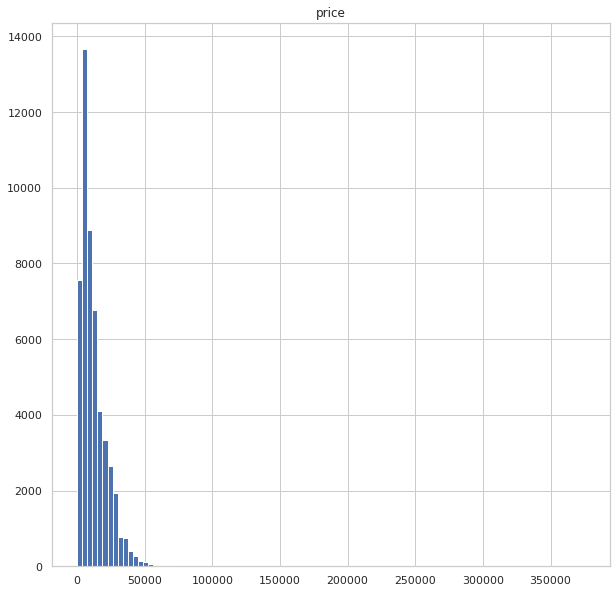

In [1277]:
#
autos.hist('price' ,bins = 100, figsize = (10,10))
plt.show()


Como se puede observar hay una gran cantidad de valores atípicos por encima de los 50000. Para comproobar esto, haremos un gráfico de caja y bigotes

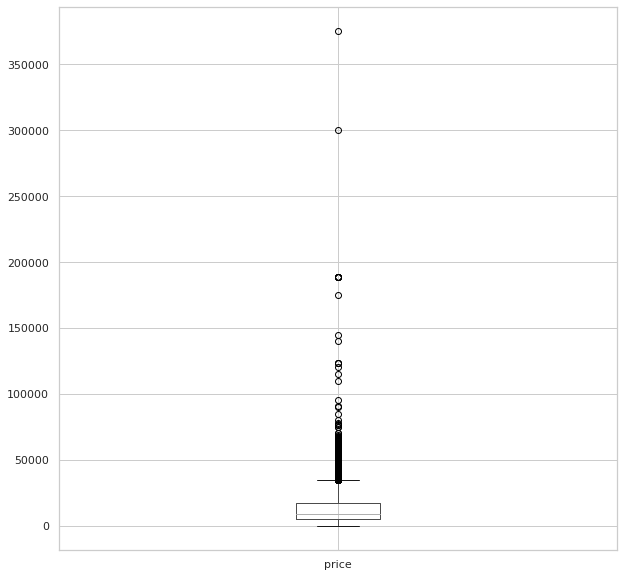

In [1278]:
autos.boxplot('price', figsize = (10,10))
plt.show()


Analizando este gráfico, podemos observar, que valores por encima de los 30000 pueden ser considerados como  atípicos. Sin embargo, de mabos gráficos podemos observar, que hay mucho valores extrañamente cercanos a 0 que no deberían de estar allí, ya que aún cunado no se nos especifica la moneda, ningún auto, bajo ninguna denomiinación estará en torno a esos valores. Se podría decir que por debajo de 1000 ya es poco usual.

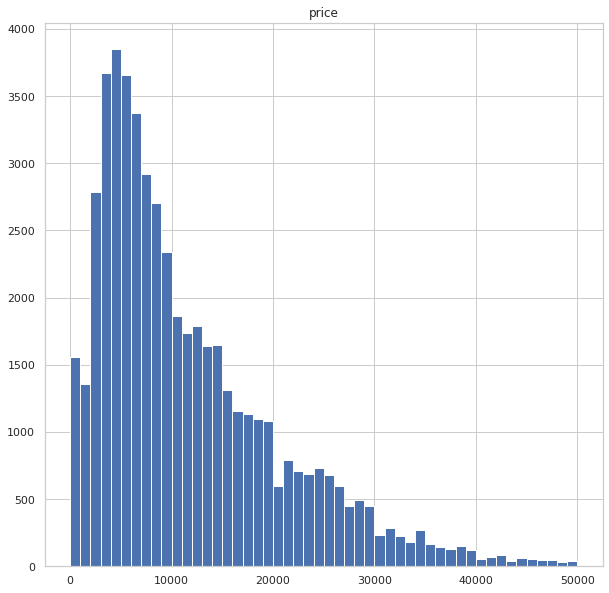

In [1279]:
#
autos.query('price < 50000').hist('price' ,bins = 50, figsize = (10,10))
plt.show()

Estudiando aún más de cerca vemos un poco más de 1500 autos estan valorados en cifras muy cercanas a 0. Esto puede ser un punto a tratar más asdelnate. A continuación veremos los valores atípicos por encima de los 50000.

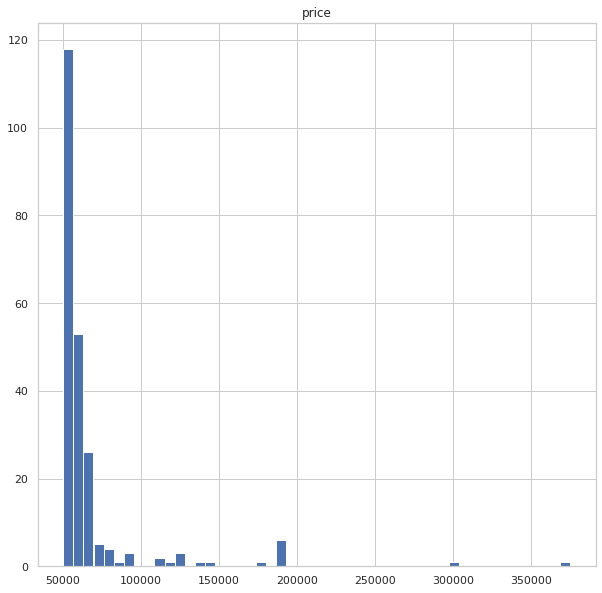

In [1280]:
autos.query('price > 50000').hist('price' ,bins = 50, figsize = (10,10))
plt.show()


In [1281]:
autos.query('price > 50000')['price'].count()

227

Aunque son pocos valores. Son lo suficientemente grandes como para afectar la media de la distribución tal como se ve en los histogramas anteriores y en análisis de los quartiles. 

A continuación estudiaremos de forma similar los valores atípicosde los años del vehículo cuando el anuncio se colocó

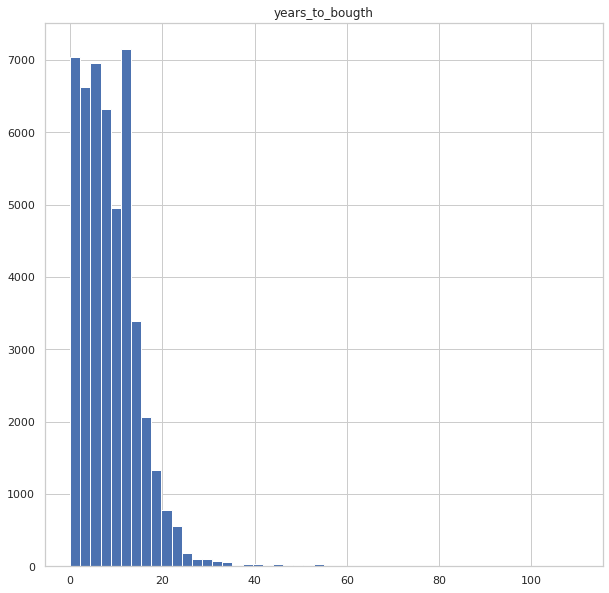

In [1282]:
#
autos.hist('years_to_bougth' ,bins = 50, figsize = (10,10))
plt.show()


Como podemos observar, la mayoría de las personas vende sus autos entre 0 y 25 años luego de que el mismo saliera a la venta por primera vez. Cabe destacar que sto no quiere decir, cuanto tiempo una persona tuvo un auto, sino cuanto leva en circulación. 

Ahora bien, es anormalemente extraño, ver autos de incluso más de 60 años. Estamos hablando de autos de la epoca de los 60. Para estudiar mejor esto, observemos el siguiente gáfico de caja y bigotes.

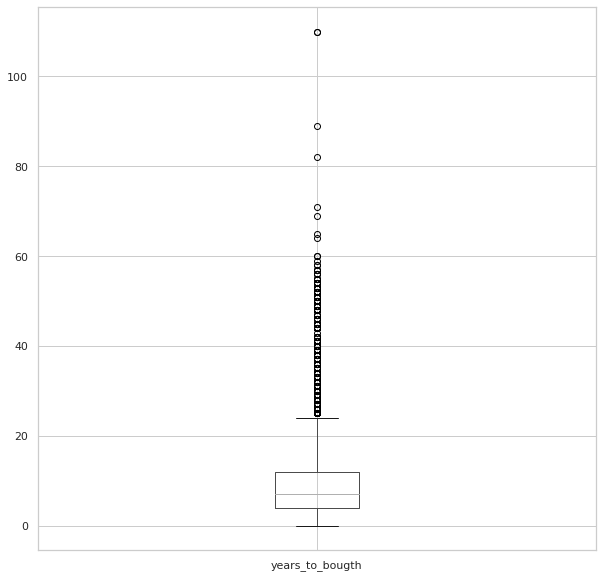

In [1283]:
autos.boxplot('years_to_bougth', figsize = (10,10))
plt.show()


Aquí se puede observar mejor. Hubo autos con incluso más de 80 años de antiguedad. Así que o se trata de un error en los datos, o se vedió uno de los primeros ejemplares de autos del mundo.

A continuación se analizará el millaje recorrido por los autos, para observar sus valores atípicos.

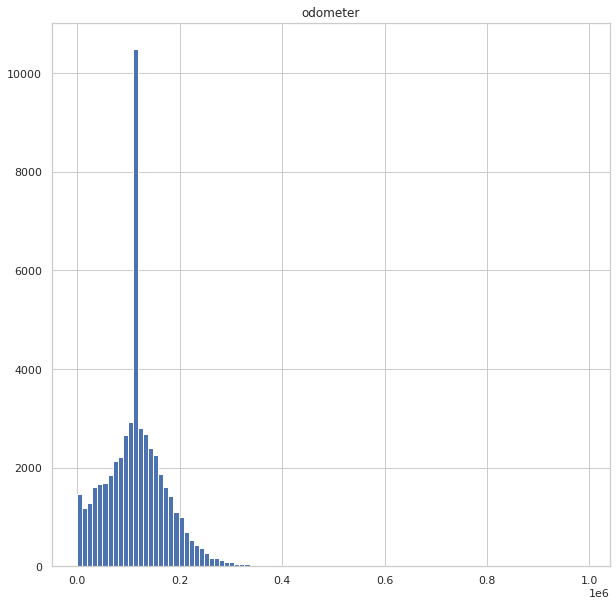

In [1284]:
#
autos.hist('odometer' ,bins = 100, figsize = (10,10))
plt.show()



Como podemos observar har valores atipicos muy cercanos al 0. Habría que comparar con elaño para determinar si el carro no ha sido usado o si por el contrario es un error de los datos. Por otro lado vemos que hay valores muy por encima de los 400000 millas, es decir 644000 kilómetros. Lo que ya está muy por encima de un kilometraje alto para un auto. Nuevamene hay que comparar con las fechas para determinar si es por los años, porque lo han usado mucho oun simple error en la data.

Observe el siguinete gráfico

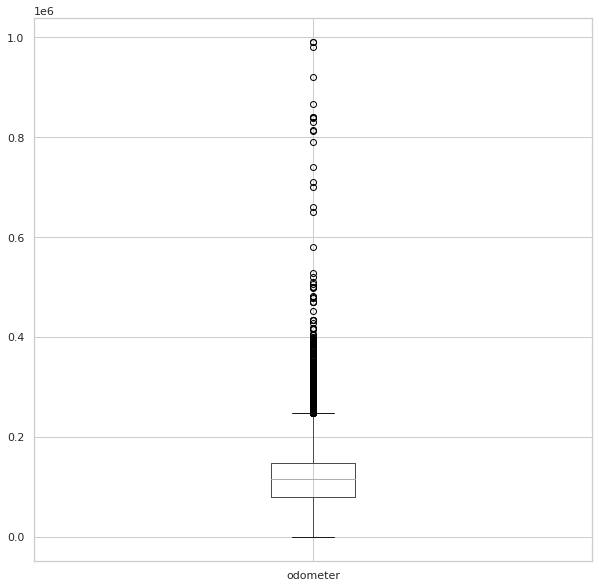

In [1285]:
autos.boxplot('odometer', figsize = (10,10))
plt.show()


Este gráfico concurda perfectamente con lo que sucede en la vida real. Un auto se considera con mucho uso luego de los 300000 millas recorridas. Vemos enconces que hay mucho valores atípicos incluso algunos llegando al 1000000 de millas, una cifra demasiado elevada para cualquier auto.

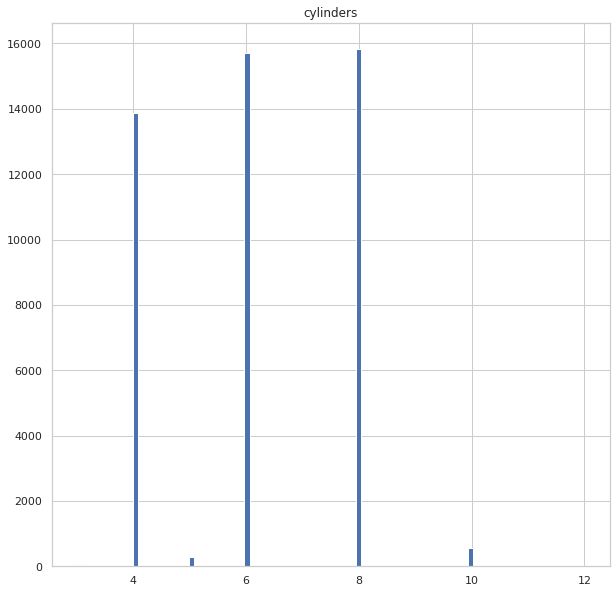

In [1286]:
#
autos.hist('cylinders' ,bins = 100, figsize = (10,10))
plt.show()



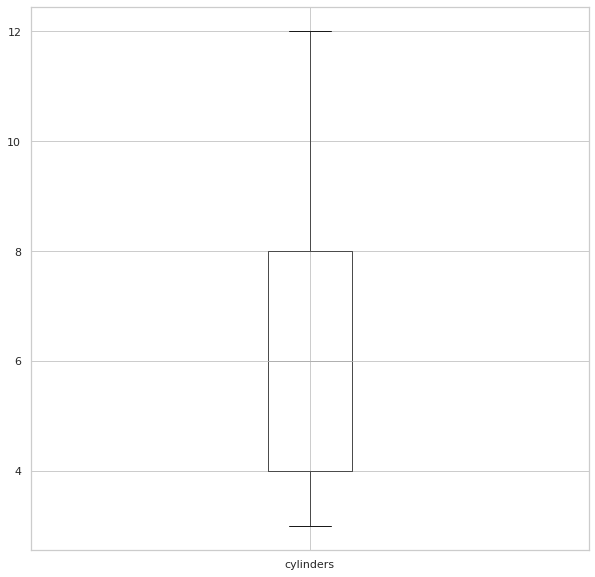

In [1287]:
autos.boxplot('cylinders', figsize = (10,10))
plt.show()


Claramente en los cilindros no hay valores atípicos, se podría decir que son valores poco usuales como autos de 12, 5 y 3 cilindros. No son muy habituales de ver, sin embargo no se considera que afecten el análisis.

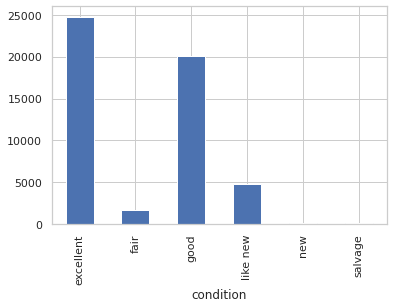

In [1288]:
#
autos.pivot_table(index = 'condition', aggfunc = 'count')['model'].plot(kind = 'bar')
plt.show()


Por último en ese gráfico de barras podemos ver que no existen valores atípicos, y que la gran mayoria de carros son usados, de allí que el millaje recorrido por los vehículos fuese elevado en la gran mayoria de los casos.

## Estudiar y tratar valores atípicos



Primeramente determinemos los limites inferiores y superiores de los precios. Para ello se analiza más de cerca la distribución de los datos:



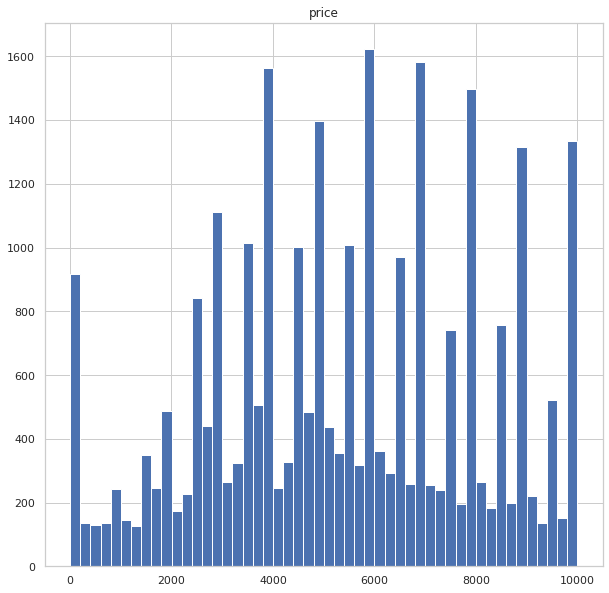

In [1289]:
autos.query('price < 10000').hist('price' ,bins = 50, figsize = (10,10))
plt.show()


Observando esto se decide calcular la proproción de datos inferiores a 1000 y de no ser tan significativa, se eliminarán para evitar que esto pueda sesgar los cálculos posteriores.

In [1290]:
autos.query('price < 1000')['price'].count()*100/autos['price'].count()

2.7248908296943233

Solo se perderá un 3% de los datos, una medida a tomar para evitar problemas a futuro. 

In [1291]:
autos_sin_a = autos.copy()
autos_sin_a.drop(autos_sin_a.query('price < 1000').index,axis = 0, inplace = True)


En consiguiente se estudia el límite superior para os valores atípicos. Basándonos en el gráfico de caja y bigotes descrito anteriormen te se decide truncar los precios en 50000.

In [1292]:
autos_sin_a.drop(autos_sin_a.query('price > 50000').index, axis = 0, inplace = True)

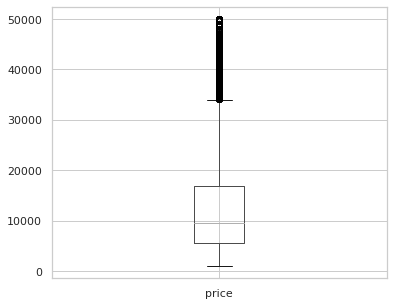

In [1293]:
autos_sin_a.boxplot('price', figsize = (6,5))
plt.show()


Estos valores tiene más sentido, ahora bién tenemos que repetir el procedimiento para los años del auto hasta la fecha del anuncio.

Como este proceso se va a repetir para cada una de las columnas se decide hacer una función que permita hacer todo este procedimiento anterior y así tuncar limites superiores e inferiores.

In [1294]:
def drop_lim(DF, lim_inf, lim_sup, colum):
  DF.drop(autos_sin_a.query(f'{colum} > {lim_sup}').index, axis = 0, inplace = True)
  DF.drop(autos_sin_a.query(f'{colum} < {lim_inf}').index, axis = 0, inplace = True)
  DF.boxplot(colum,figsize = (6,5))

Se decide truncar los datos entre 0 y 20 años para su compra, ya que son carros un poco más modernos, Carros más antiguos ya entran casi en una categoría para coleccionistas. A continuación podemos observar como desaparecieron los valores atípicos

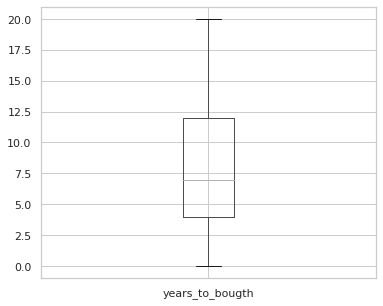

In [1295]:
drop_lim(autos_sin_a, 0, 20, 'years_to_bougth')

Ahora bien, haciendo un análisis se considera que el millaje adecuado de un auto de unos 20 años de uso no debería ser superior a las 300000 millas. Es por ello que truncaremos en estos valores. Aún así estamos dejando algúnos atípicos, pero son necesarios para que sea consono con la realidad, ya que hay autos que se usan demasiado por diversos motivos.

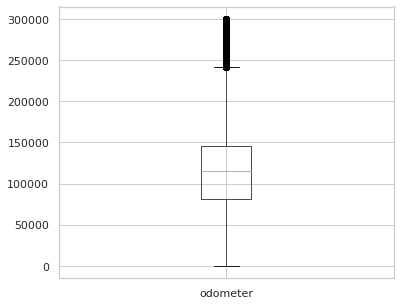

In [1296]:
drop_lim(autos_sin_a, 0, 300000, 'odometer')

Ahora bién los cilindros no tiene valores atípicos, y el estado tampoco. O almenos no son nada de que preocuparse.

## Estudiar parámetros principales sin valores atípicos

Para realizar un análisis más profundo, se procede a comparar los histogramas sin y con datos atípicos. Para ello se crea una función que muestra ambos en un mismo plot.

In [1297]:
def graficos_hist(colums):
  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(10,5)

  ax[0].set_title(f'Columna: "{colums}" con atípicos')
  ax[0].hist(autos[colums] ,bins = 50)

  ax[1].set_title(f'Columna: "{colums}" sin atípicos')
  ax[1].hist(autos_sin_a[colums] ,bins = 50)
  plt.show()

Primero analizamos el precio.

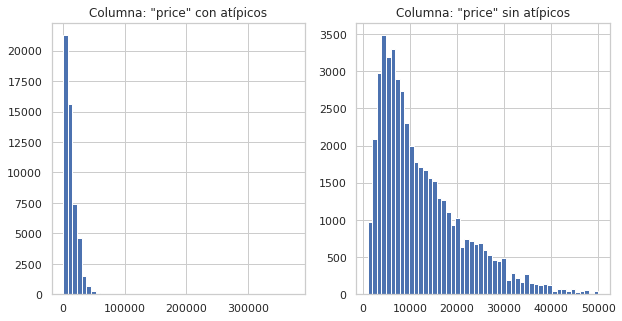

In [1298]:
graficos_hist('price')

Se visualiza como ahora no tenemos los valores inferiores a 1000, lo cual hace sentido, ya que los autos por lo genral son costosos. Así mismo eliminamos los autos exceivamente caros, que son ya de un target muy alto, que muy pocas personas pueden permitirse.

Ahora estudiamos los años del auto en el mercado

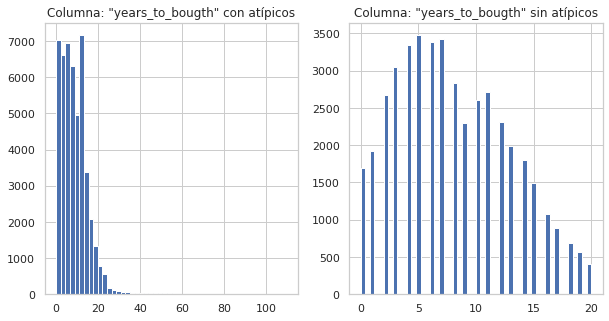

In [1299]:
graficos_hist('years_to_bougth')


Como podemos observar, ahora si se muetra la discretización característica de los datos de años concretos. Y eliminamos los valores de los autos que son más antiguos, permitiendionos ver como que existen varios autos con menos de 5 años en el mercado, bastante nuevos y atractivos para los consumidores. De no haberlos segmentado, esto pudo ser dificil de ver.

Por último, se estudia el millaje de los autos.

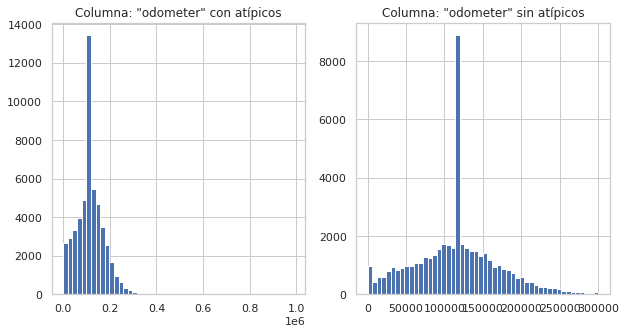

In [1300]:
graficos_hist('odometer')

Se logran observar autos que van desde 0 kilómetros, hasta 300000, donde hay una clara tendencia de vender los autosluego de recorrer 115553 millas. (Este dato tan exacto se obtuvo del describe hecho anteriormente) Se evidencia un posible error en la data, ya que millajes superiores a los 400000 millas, es algo incluso dificil de lograr.

## Periodo de colocación de los anuncios

Para poder determinar el periodo de colocación habitual de un anuncio, primero debemos determinar en nuestro dataframe sin atípicos cual es la media y mediana general dentro de `days_listed`,luego se debe establecer un criterio que permita estudiar que ¿Que hace que se venda rápido un auto? ¿su kilometraje? ¿su color? ¿su precio? ¿su modelo? Y de esta manera tamabién saber cuando el tiempo fue anormalemnete corto o largo. Esto es lo que vamos a estudiar a continuación 

Primeramente observamos la media y mediana general:

In [1301]:
autos_sin_a['days_listed'].describe()

count    48111.00000
mean        39.56883
std         28.22739
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

Vemos que de media, se tardan aproximadamente 40 días en vender un auto. Sin embargo, La mediana de los valores, está en torno a los 33 días, esto es debido a los valorea típicos presentes en esta distribución. Del mismo modo, podemos ver que existen autos que fueron vendidos de inmediato e incluso algunos que se vendieron luego de meses.

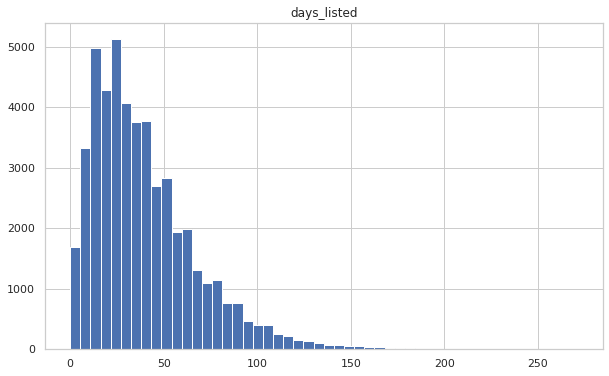

In [1302]:
autos_sin_a.hist('days_listed', bins = 50, figsize = (10,6))
plt.show()


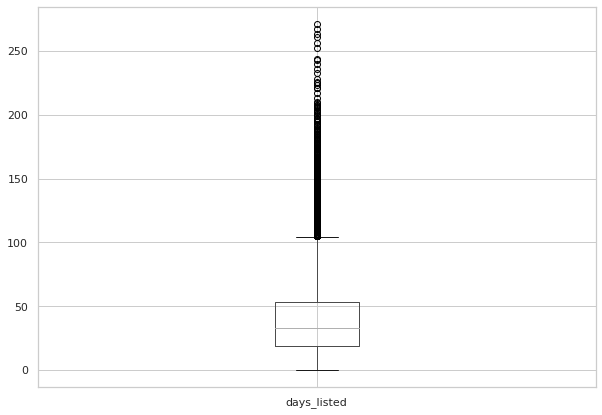

In [1303]:
autos_sin_a.boxplot('days_listed',figsize = (10,7))
plt.show()

De estos gráficos podemos observar que los valores por encima de los 100 días ya se consideran atípicos, es decir, un auto debería venderse en menos de 3 meses, de lo contrario, incluso el 75% de ellos se vende en menos de 2, de no se así, algo sucede. Eso es lo que se pretende estudiar a continuación.

In [1304]:
autos_mas_vendidos = autos_sin_a.pivot_table(index = 'model', values = ['days_listed','price','odometer']).sort_values(by = 'days_listed')
autos_mas_vendidos.head(10)

,days_listed,odometer,price
model,,,
dodge dakota,35.487805,142497.171504,5360.600000
ford f250,36.193333,131100.615162,18076.046667
honda pilot,37.109272,137192.286838,9728.543046
volkswagen passat,37.233038,90632.204248,8719.185841
hyundai elantra,37.420673,92624.378729,7461.860577
nissan maxima,37.512635,106715.501842,7843.678700
nissan altima,37.585897,106989.852794,7229.934615
ford f250 super duty,37.617391,137761.739382,15611.426087
chevrolet camaro,37.792517,77620.043715,15119.197279


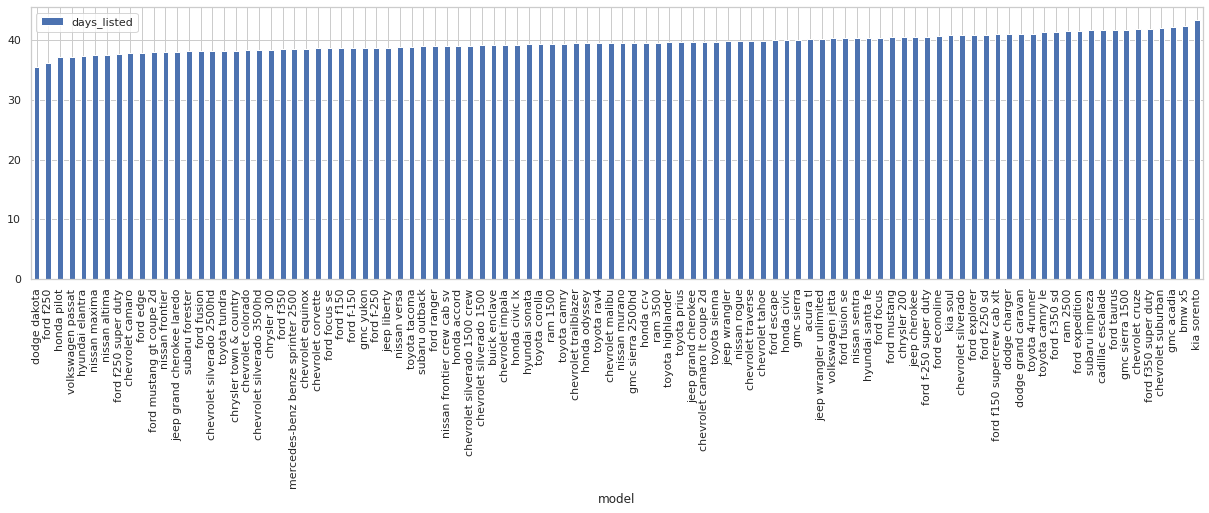

In [1305]:
autos_mas_vendidos.plot(kind = 'bar', y ='days_listed', figsize = (21,5))
plt.show()

Aquí podemos observar cuales on los modelos de autos que se vendieron más rápidamente, y cual fue su precio medio. Podemos ver que en su mayoría son económicos y tienen bajo kilometraje. Sin embargo, esta infomación no es demasiado util, ya que la diferencia entre el máximo y el mínimo de días es solo de 5 en promedio.

## Precio promedio por cada tipo de vehículo

A continuación se procede a analizar, el precio promedio según la marca de los vehículos y cuantos anuncios de estos se mostraron, para con ello poder saber qeu modelo es el más vendido y cual fué su precio. 

In [1306]:
autos_modelo = autos_sin_a.pivot_table(index = 'model', values = 'price', aggfunc = ['mean','count'])
autos_modelo.columns = ['mean_price','ad_number']
autos_modelo = autos_modelo.sort_values(by = 'ad_number', ascending = False )
autos_modelo.head(10)

,mean_price,ad_number
model,,
ford f-150,14505.753792,2571
chevrolet silverado 1500,16005.617154,2087
ram 1500,15056.571862,1649
chevrolet silverado,14804.300870,1150
ram 2500,22539.033673,980
jeep wrangler,16899.216017,949
toyota camry,7246.932476,933
honda accord,6685.634066,910
chevrolet silverado 2500hd,19145.815851,858


Podemos ver que los dos vehículos con más anuncios son el `ford f-150` y el `chevrolet silverado 1500` con un precio de 14505 y 16005 respectivamente. Podemos ver su dependencia en la siguiente gráfica.

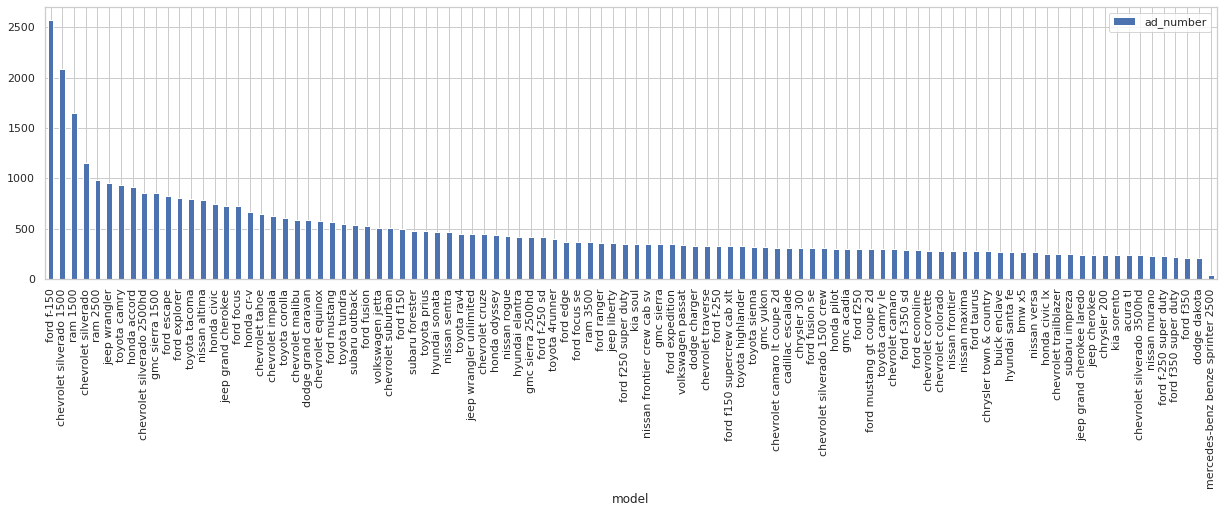

In [1307]:
autos_modelo.plot(kind = 'bar', y ='ad_number', figsize = (21,5))
plt.show()

Del mismo modo se procede a estudiar la correlación entre el precio medio y la cantidad de autos vendidos, para determinar si esto es algo a considrar o no.

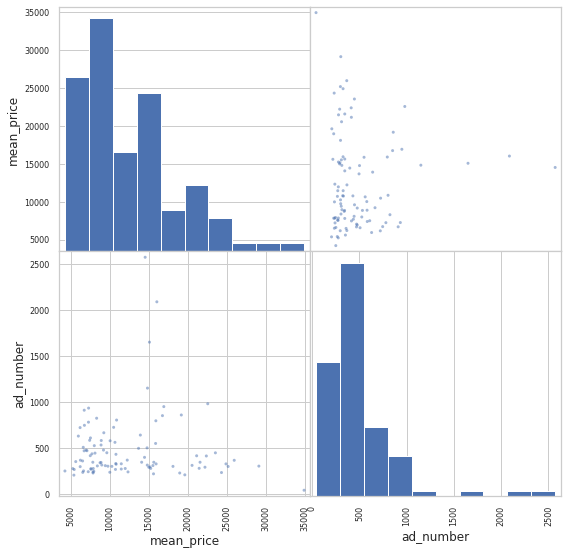

In [1308]:
pd.plotting.scatter_matrix(autos_modelo, figsize=(9, 9), grid = True)
plt.show()

Como podemos ver, no hay una clara correlación, por lo que el precio no es la única variable que consideran los individuos a la hora de comprar un auto.

## Factores de precio

Para poder determinar ¿Qué factores impactan más sobre el precio?, se va a estudiar el mismo con respecto a diversos factores como la edad, millaje, condición, tipo de transmisión, color, entre otros. Para las variables numéricas, se estudiarán los valores por medio de matrices y graficos de correlación. Mientras que las categóricas se analizarán por medio de las tablas y los gráficos de caja y bigotes.

Primeramente se crea la tabla con la que se estudiarán las matrices y gráficos de disperción.

In [1309]:
autos_dependencia = autos_sin_a.pivot_table(index = 'model', values = ['years_to_bougth','odometer','odometer_mean','days_listed'], aggfunc = 'mean').reset_index()
autos_modelo = autos_modelo.reset_index()
autos_dependencia = autos_dependencia.merge(autos_modelo,on = 'model').sort_values(by = 'ad_number', ascending = False)
autos_dependencia.head(10)


,model,days_listed,odometer,odometer_mean,years_to_bougth,mean_price,ad_number
32,ford f-150,38.677946,122686.089818,20139.951589,8.185744,14505.753792,2571
13,chevrolet silverado 1500,39.122664,117878.377199,20696.717989,7.611284,16005.617154,2087
82,ram 1500,39.388114,110993.473372,21175.318718,7.436482,15056.571862,1649
12,chevrolet silverado,40.806957,124800.230264,18274.955317,9.111637,14804.300870,1150
83,ram 2500,41.467347,130139.939359,23109.895115,8.394475,22539.033673,980
69,jeep wrangler,39.774499,103012.576996,14647.073356,9.598416,16899.216017,949
89,toyota camry,39.390139,124795.511200,16942.100411,9.396141,7246.932476,933
56,honda accord,39.009890,124744.066641,15643.695078,9.644658,6685.634066,910
15,chevrolet silverado 2500hd,38.187646,136984.194490,21294.506492,8.806452,19145.815851,858
53,gmc sierra 1500,41.754407,118089.208111,20063.454913,7.821473,16725.135135,851


Se procede a realizar la matriz de correlación.

In [1310]:
autos_dependencia.corr()

,days_listed,odometer,odometer_mean,years_to_bougth,mean_price,ad_number
days_listed,1.000000,0.043255,0.048463,-0.043468,-0.005623,-0.006289
odometer,0.043255,1.000000,-0.430458,0.791839,-0.235685,0.074364
odometer_mean,0.048463,-0.430458,1.000000,-0.814666,0.305169,0.062954
years_to_bougth,-0.043468,0.791839,-0.814666,1.000000,-0.271448,0.016034
mean_price,-0.005623,-0.235685,0.305169,-0.271448,1.000000,0.005151
ad_number,-0.006289,0.074364,0.062954,0.016034,0.005151,1.000000


Analizando detenidamente los factores que más influyen en el precio. Tenemos el millaje, el cual es inversamnete proporcional, entre más millas tiene un carro recorridas, menor será el precio, de la misma manera que con la edad del auto. Y aunque parezca la cantidad de millas por año es inversamente proporcional a la cantidad de millas reocrridas. Sin embargo esto hace sentido, ya que entre más años tenga un auto, mayor será entonces la cantidad de millas recorridas, pero también esas millas pueden dividirse entre más años, haciendo que sean menos millas por año las que se recorren. Pueto en un jemplo, si en un año no sacas tu carro y al siguiente lo susas todo los días la media te dará al 50% del recorrido original en 2 años, una relación  inversamente proporcional que depende del uso del usuario.

Los demás valores no afectan de ninguna manera el precio, ni la cantidad de anuncios, ni la cantidad de días listados. y todo esto se evidencia de manera gráfica a continuación.

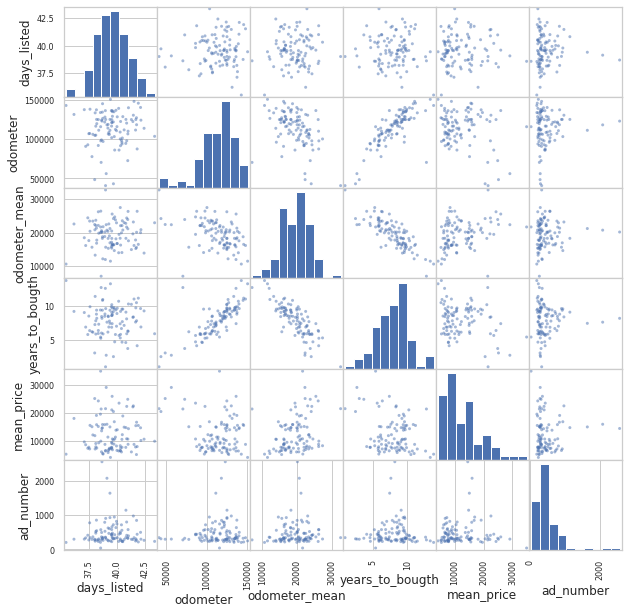

In [1311]:
pd.plotting.scatter_matrix(autos_dependencia, figsize=(10,10), grid = True)
plt.show()

Ahora estudiaremos las variables categóricas, comanzando por el color de los autos:

In [1312]:
def autos_categoria(categ):
  autos_categ = autos_sin_a.pivot_table(index = ['model',categ], values = 'price', aggfunc = ['mean','count'])
  autos_categ.columns = ['mean_price','ad_number']
  autos_categ = autos_categ.query('ad_number > 50').sort_values(by = 'ad_number', ascending = False).reset_index()

    
  fig, ax = plt.subplots(figsize = (10, 5))
  seaborn.set(style='whitegrid')

  seaborn.boxplot(x=autos_categ[categ],
                  y=autos_categ['mean_price'],)
  plt.show()

  return autos_categ.head(10)

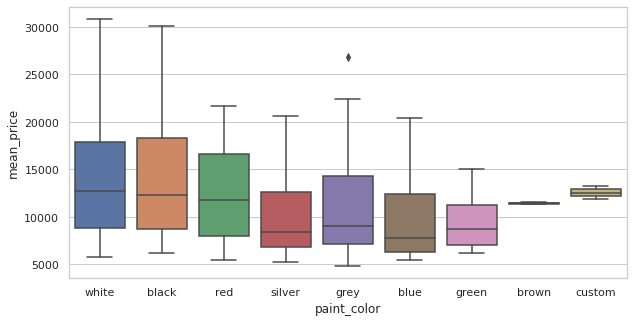

,model,paint_color,mean_price,ad_number
0,ford f-150,white,13890.034732,691
1,chevrolet silverado 1500,white,15498.206413,499
2,ford f-150,black,16463.307263,358
3,ram 1500,white,16008.602339,342
4,ram 2500,white,22318.287926,323
5,ford f-150,red,12964.141956,317
6,chevrolet silverado 1500,black,18415.182410,307
7,chevrolet silverado,white,14433.599327,297
8,chevrolet silverado 2500hd,white,19185.790378,291
9,ram 1500,black,16857.375887,282


In [1313]:
autos_categoria('paint_color')

Podemos observar, que el color de los autos no es un factor demasiado determinante en lo que aumentar el valor de un auto se refiere. De hecho los mantiene en un valor mediano de unos 10000. Sin embargo observando los graficos obtenidos, podemos ver que los colores que más venden los autos, y que efectivamente aumentan el precio de estos son el blanco, el negro y un tanto el rojo.

Ahora anlizamos la trasnmisión:

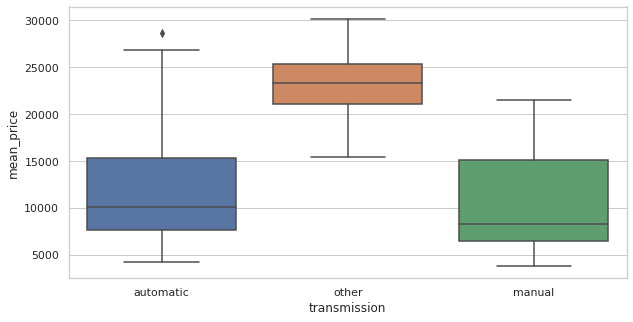

,model,transmission,mean_price,ad_number
0,ford f-150,automatic,14647.360571,2521
1,chevrolet silverado 1500,automatic,16057.027563,2068
2,ram 1500,automatic,15257.106608,1604
3,chevrolet silverado,automatic,14899.573192,1134
4,toyota camry,automatic,7270.832427,919
5,ram 2500,automatic,23075.467269,886
6,chevrolet silverado 2500hd,automatic,19163.955659,857
7,honda accord,automatic,6716.290437,847
8,gmc sierra 1500,automatic,16766.723731,847
9,ford escape,automatic,8351.720443,812


In [1314]:
autos_categoria('transmission')

Como podemos observar, tener una transmisión hibrida si es un factor determinante que aumenta el precio de los autos, sin embargo la automatica en promedio esta u poco por encima de la manual.

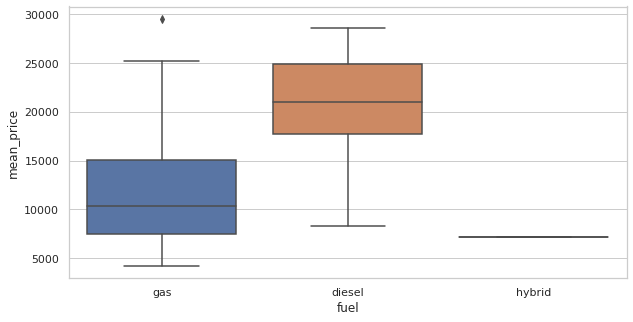

,model,fuel,mean_price,ad_number
0,ford f-150,gas,14483.052344,2560
1,chevrolet silverado 1500,gas,15998.173661,2073
2,ram 1500,gas,14809.045028,1599
3,chevrolet silverado,gas,14046.319882,1016
4,jeep wrangler,gas,16899.216017,949
5,toyota camry,gas,7243.524946,922
6,honda accord,gas,6676.996685,905
7,gmc sierra 1500,gas,16733.351001,849
8,ford escape,gas,8299.179141,815
9,ford explorer,gas,10840.571072,802


In [1315]:
autos_categoria('fuel')

Tener un auto a diesel es un factor bastanet determinante que aumenta mucho el precio de los autos, debido a que este es más economico en muchos paiese y por lo tanto más solicitados.

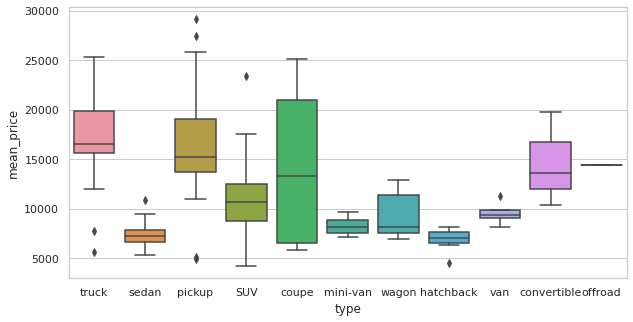

,model,type,mean_price,ad_number
0,ford f-150,truck,14889.469942,1730
1,chevrolet silverado 1500,truck,16528.349306,1440
2,ram 1500,truck,15907.385782,1055
3,toyota camry,sedan,7260.254625,919
4,ford f-150,pickup,13756.718938,829
5,honda accord,sedan,6740.681529,785
6,jeep wrangler,SUV,17569.515584,770
7,ford escape,SUV,8304.161725,742
8,ford explorer,SUV,10774.544180,713
9,nissan altima,sedan,7286.994366,710


In [1316]:
autos_categoria('type')

También podemos observar que los autos que más aumentan el precio de los mismos, son los tipo, tractor, pickup, dependiendo del tipo de coupe, y los convertibles.

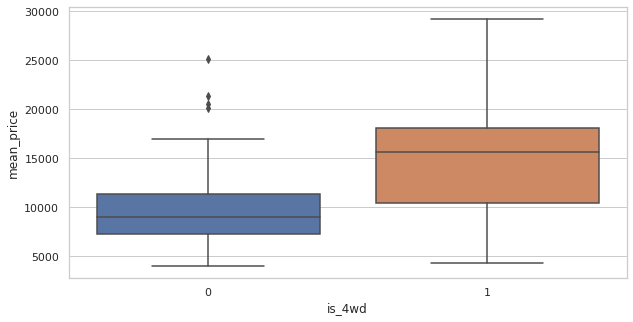

,model,is_4wd,mean_price,ad_number
0,ford f-150,1,16163.878646,1920
1,chevrolet silverado 1500,1,17322.391714,1593
2,ram 1500,1,16729.197935,1162
3,jeep wrangler,1,16959.740821,926
4,toyota camry,0,7204.342764,919
5,honda accord,0,6707.194229,901
6,ram 2500,1,23968.961717,862
7,chevrolet silverado,1,16070.410165,846
8,nissan altima,0,7233.997429,778
9,chevrolet silverado 2500hd,1,20162.463514,740


In [1317]:
autos_categoria('is_4wd')

Por último los carros con tracción de 4 ruedas definitivamente aumentan el precio de estos.

## Conclusión general
En conclusión se pudieron llegar a estudiar en profundidad, que factores son los que pueden afectar el precio de los autos en este caso de estudio.

**Preprocesameinto de datos:**

* En este caso el reto fúe lograr completar los valores ausentes y determinar los tipo de datos a utilizar
  * Primeramente se rellenaron los valores ausentes en alas millas tomando enc uenta la correlación que debe existoir entre el tiepo devida de un auto y cuando recorre este.
  *   Así mismo de cambiaron los valores NAN de las tracción en las 4 ruedas por 0, ya que querian decri falso.
  * Sin embargo, no fué posible rellenar los valores ausnetes en el año del modelo, número de cilindros o el color de la pintura. El año del modelo y número de cilindros son especificaciones de cada modelo, colocarlo basandonos en este y en el año no sería corrcto, ya que puede haber un ford f-150 del 2008 con 4 cilindros o de 8, y que incluso uno del 2010 con 6 u 10 cilindros, por lo que rellenandolo con la media, mediano o moda lo unico que causará será sesgar los datos. Con el color, es una característica arbitraria, no se puede rellenar por las mismas razones antes mencionadas. Por lo que son un mla necesario.
  * Se cambiaron los tipos de dato `float` a `Int64` en el caso de los cilindros y a `DateTime` en el caso del año  de modelo y la fecha de venta.

**Tratamiento de valores atípicos**
* Al realizar los histogramas de las variables númericas de la tabla principal, se observó la gran canridad de atípicos que habian. Cosa que no es de extrañar cuando de autos se refiere, ya que hay muy antiguos que valen mucho o poco, así como carros muy caros o muy económicos. Lo que se hizo fué mediante gráficos de caja y bigotes determinar que valores estaban fuera de rango y truncar la data almacenandola en otro DataFrame.
  * Se deciciío que el precio debia oscilar entre 1000 y 50000, ya que precios inferiores no hacen sentido y superiores son demasiado atípicos para la clase media alta, como para considerarlos en el análisis.
  * Se decidió Truncar los años de 20años hacia abajo, ya que el resto son muy viejos, y pueden perjudicar el análisis, ya que son carros que no compra el común denominador de las personas.
  * Se truncó el millaje a un máximo de 300000 millas, ya que por encima son basatent dificiles de vender y probablemente signifique que es un auto viejo, o que lo han usado demasiado, por lo que es de más cuidado.
  * El resto de columnas no se considera que tuvieran atípicos.

**Análisis del precio**

* Se llegó a la conclusión que los dos autos más publicados son el ford f-150 y el chevrolet silverado 1500, Así mismo, los valores que más contribuyen a las fluctuaciones en el precio son:
  * Los factores numéricos que más influyen en el precio, son el millaje, el cual es inversamnete proporcional, entre más millas tiene un carro recorridas, menor será el precio, de la misma manera que con la edad del auto. Sin embargo la correlación entre estos no es tan fuerte, como para considerarse como tal.
  * Podemos observar, que el color de los autos no es un factor demasiado determinante en lo que aumentar el valor de un auto se refiere. De hecho los mantiene en un valor mediano de unos 10000. Sin embargo observando los graficos obtenidos, podemos ver que los colores que más venden los autos, y que efectivamente aumentan el precio de estos son el blanco, el negro y un tanto el rojo.
  * Tener una transmisión hibrida si es un factor determinante que aumenta el precio de los autos, sin embargo la automatica en promedio esta u poco por encima de la manual.
  * Tener un auto a diesel es un factor bastanet determinante que aumenta mucho el precio de los autos, debido a que este es más economico en muchos paiese y por lo tanto más solicitados.
  * También podemos observar que los autos que más aumentan el precio de los mismos, son los tipo, tractor, pickup, dependiendo del tipo de coupe, y los convertibles.
  * Por último los carros con tracción de 4 ruedas definitivamente aumentan el precio de estos.